In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
data = pd.read_csv(r"C:\Users\user\Downloads\Crime files india.csv")

In [32]:
data

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,NaN,2.0,91.0,63.0


In [33]:
data.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [34]:
data = data.fillna(0)

In [35]:
data.isnull().sum()

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
dtype: int64

In [36]:
data.duplicated().any()

False

In [37]:
data.tail(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
1008,Odisha,2010,Murder - Total Victims,3. Total,104.0,1319,0.0,10.0,2.0,566.0,637.0
1009,Puducherry,2010,Murder - Total Victims,3. Total,8.0,34,0.0,0.0,0.0,13.0,13.0
1010,Punjab,2010,Murder - Total Victims,3. Total,86.0,945,9.0,21.0,18.0,384.0,427.0
1011,Rajasthan,2010,Murder - Total Victims,3. Total,135.0,1421,22.0,29.0,42.0,567.0,626.0
1012,Sikkim,2010,Murder - Total Victims,3. Total,3.0,17,1.0,2.0,0.0,4.0,7.0
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,0.0,2.0,91.0,63.0
1017,West Bengal,2010,Murder - Total Victims,3. Total,120.0,2415,8.0,2.0,6.0,1177.0,1102.0


In [38]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_7720\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
Year,1.000000,-0.003962,-0.030773,-0.024014,0.012448,-0.136112,-0.025120,-0.034111
Victims_Above_50_Yrs,-0.003962,1.000000,0.922285,0.763368,0.611178,0.689337,0.864020,0.923281
Victims_Total,-0.030773,0.922285,1.000000,0.792607,0.522077,0.745846,0.986675,0.991392
Victims_Upto_10_15_Yrs,-0.024014,0.763368,0.792607,1.000000,0.500751,0.847720,0.755783,0.761201
Victims_Upto_10_Yrs,0.012448,0.611178,0.522077,0.500751,1.000000,0.366872,0.453053,0.513829
Victims_Upto_15_18_Yrs,-0.136112,0.689337,0.745846,0.847720,0.366872,1.000000,0.708548,0.718849
Victims_Upto_18_30_Yrs,-0.025120,0.864020,0.986675,0.755783,0.453053,0.708548,1.000000,0.965120
Victims_Upto_30_50_Yrs,-0.034111,0.923281,0.991392,0.761201,0.513829,0.718849,0.965120,1.000000


In [39]:
data.describe()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,2005.512770,63.842829,683.406680,8.206287,13.019646,15.113949,311.956778,271.267191
std,2.866127,99.046292,1015.595667,20.138964,24.300876,37.337557,482.501445,395.078021
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,2.000000,31.000000,0.000000,0.000000,0.000000,12.000000,12.000000
50%,2006.000000,20.000000,258.000000,1.000000,2.000000,2.000000,112.500000,100.000000
75%,2008.000000,82.000000,1011.750000,8.000000,15.000000,11.000000,415.750000,409.750000
max,2010.000000,824.000000,8180.000000,218.000000,189.000000,347.000000,3724.000000,3143.000000


In [40]:
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_7720\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Year                     -0.006478
Victims_Above_50_Yrs      2.661971
Victims_Total             2.874673
Victims_Upto_10_15_Yrs    5.481939
Victims_Upto_10_Yrs       3.222009
Victims_Upto_15_18_Yrs    4.550856
Victims_Upto_18_30_Yrs    2.978727
Victims_Upto_30_50_Yrs    2.663137
dtype: float64

In [41]:
data.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_7720\2361870383.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


Year                      -1.220988
Victims_Above_50_Yrs       9.422730
Victims_Total             11.502651
Victims_Upto_10_15_Yrs    37.776599
Victims_Upto_10_Yrs       13.164883
Victims_Upto_15_18_Yrs    24.988797
Victims_Upto_18_30_Yrs    11.481218
Victims_Upto_30_50_Yrs    10.152258
dtype: float64

In [42]:
data.shape

(1018, 11)

In [43]:
data.head(2)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,0.0,6,0.0,0.0,0.0,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0


In [44]:
data['Victims_Upto_15_18_Yrs'].value_counts()

0.0      367
2.0       80
1.0       76
3.0       54
4.0       47
        ... 
102.0      1
119.0      1
51.0       1
85.0       1
126.0      1
Name: Victims_Upto_15_18_Yrs, Length: 110, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_7720\3612177545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr())


<Axes: >

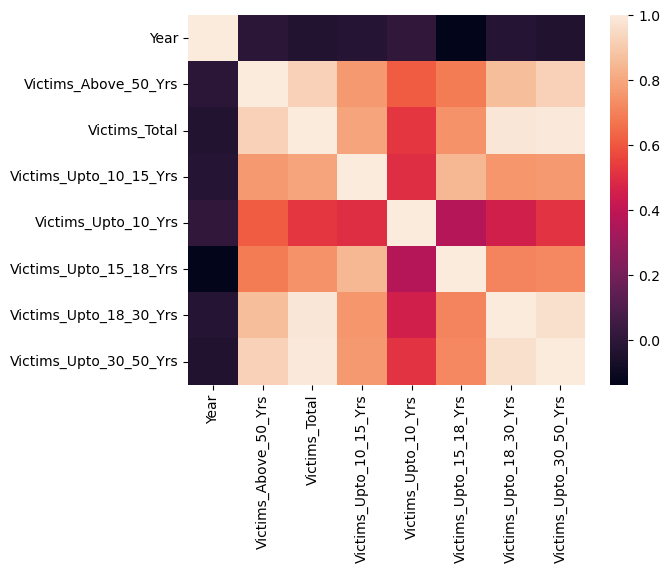

In [45]:
sn.heatmap(data.corr())

In [46]:
data =  pd.get_dummies(data)

In [47]:
data

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,...,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims,Sub_Group_Name_1. Male Victims,Sub_Group_Name_2. Female Victims,Sub_Group_Name_3. Total
0,2001,0.0,6,0.0,0.0,0.0,4.0,2.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,2001,67.0,607,15.0,38.0,43.0,269.0,175.0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2001,2.0,16,0.0,0.0,0.0,10.0,4.0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2001,11.0,128,8.0,4.0,23.0,45.0,37.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2001,12.0,366,0.0,0.0,40.0,191.0,123.0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,2010,327.0,1908,13.0,63.0,16.0,650.0,839.0,0,0,...,0,0,0,0,0,0,1,0,0,1
1014,2010,24.0,159,2.0,0.0,0.0,60.0,73.0,0,0,...,1,0,0,0,0,0,1,0,0,1
1015,2010,344.0,4456,82.0,138.0,126.0,2358.0,1408.0,0,0,...,0,1,0,0,0,0,1,0,0,1
1016,2010,19.0,176,1.0,0.0,2.0,91.0,63.0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [51]:
data['Victims_Upto_18_30_Yrs']

0          4.0
1        269.0
2         10.0
3         45.0
4        191.0
         ...  
1013     650.0
1014      60.0
1015    2358.0
1016      91.0
1017    1177.0
Name: Victims_Upto_18_30_Yrs, Length: 1018, dtype: float64

In [53]:
x = data.drop(['Victims_Upto_18_30_Yrs'] , axis =1)

In [54]:
x.head()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,Area_Name_Arunachal Pradesh,...,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims,Sub_Group_Name_1. Male Victims,Sub_Group_Name_2. Female Victims,Sub_Group_Name_3. Total
0,2001,0.0,6,0.0,0.0,0.0,2.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2001,67.0,607,15.0,38.0,43.0,175.0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2001,2.0,16,0.0,0.0,0.0,4.0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,2001,11.0,128,8.0,4.0,23.0,37.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2001,12.0,366,0.0,0.0,40.0,123.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


C:\Users\user\AppData\Local\Temp\ipykernel_7720\636167014.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['Victims_Upto_18_30_Yrs'] , color = 'red')


<Axes: xlabel='Victims_Upto_18_30_Yrs', ylabel='Density'>

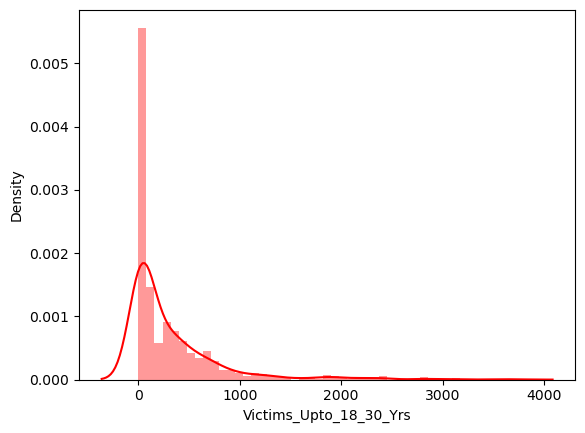

In [60]:
sn.distplot(data['Victims_Upto_18_30_Yrs'] , color = 'red')

In [65]:
def norm_func(i):
    x =  (i-i.min())/(i.max()-i.min())
    return(x)

In [76]:
data_norm = norm_func(data)

In [77]:
data_norm

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,...,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims,Sub_Group_Name_1. Male Victims,Sub_Group_Name_2. Female Victims,Sub_Group_Name_3. Total
0,0.0,0.000000,0.000733,0.000000,0.000000,0.000000,0.001074,0.000636,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.081311,0.074205,0.068807,0.201058,0.123919,0.072234,0.055679,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.002427,0.001956,0.000000,0.000000,0.000000,0.002685,0.001273,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.013350,0.015648,0.036697,0.021164,0.066282,0.012084,0.011772,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.014563,0.044743,0.000000,0.000000,0.115274,0.051289,0.039135,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1.0,0.396845,0.233252,0.059633,0.333333,0.046110,0.174544,0.266942,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1014,1.0,0.029126,0.019438,0.009174,0.000000,0.000000,0.016112,0.023226,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1015,1.0,0.417476,0.544743,0.376147,0.730159,0.363112,0.633190,0.447980,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1016,1.0,0.023058,0.021516,0.004587,0.000000,0.005764,0.024436,0.020045,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


C:\Users\user\AppData\Local\Temp\ipykernel_7720\947033285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_norm)


<Axes: ylabel='Density'>

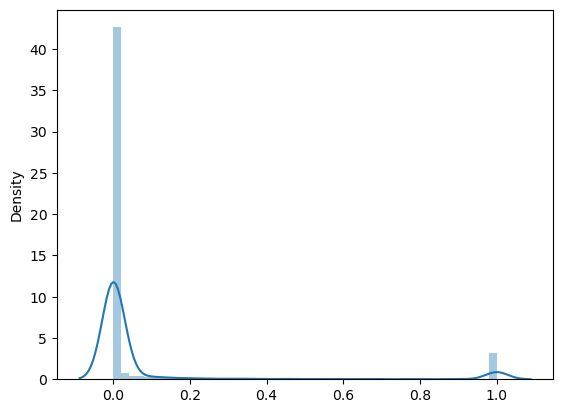

In [79]:
sn.distplot(data_norm)

In [81]:
y = data_norm['Victims_Upto_18_30_Yrs']

In [82]:
y

0       0.001074
1       0.072234
2       0.002685
3       0.012084
4       0.051289
          ...   
1013    0.174544
1014    0.016112
1015    0.633190
1016    0.024436
1017    0.316058
Name: Victims_Upto_18_30_Yrs, Length: 1018, dtype: float64

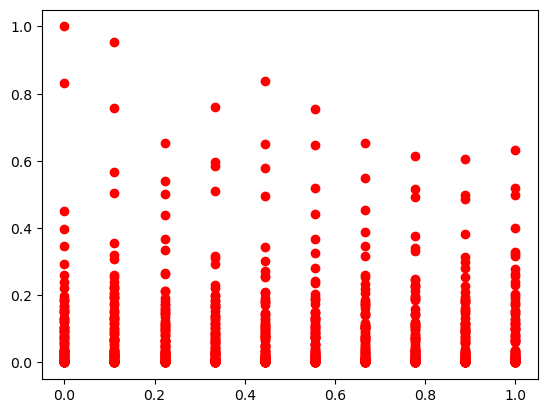

In [83]:
plt.scatter(x = 'Year' , y = 'Victims_Upto_18_30_Yrs' , data = data_norm ,  color = 'red')

In [84]:
x = data_norm.drop(['Victims_Upto_18_30_Yrs'] , axis = 1)

In [85]:
x

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,Area_Name_Arunachal Pradesh,...,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims,Sub_Group_Name_1. Male Victims,Sub_Group_Name_2. Female Victims,Sub_Group_Name_3. Total
0,0.0,0.000000,0.000733,0.000000,0.000000,0.000000,0.000636,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.081311,0.074205,0.068807,0.201058,0.123919,0.055679,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.002427,0.001956,0.000000,0.000000,0.000000,0.001273,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.013350,0.015648,0.036697,0.021164,0.066282,0.011772,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.014563,0.044743,0.000000,0.000000,0.115274,0.039135,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1.0,0.396845,0.233252,0.059633,0.333333,0.046110,0.266942,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1014,1.0,0.029126,0.019438,0.009174,0.000000,0.000000,0.023226,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1015,1.0,0.417476,0.544743,0.376147,0.730159,0.363112,0.447980,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1016,1.0,0.023058,0.021516,0.004587,0.000000,0.005764,0.020045,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [86]:
x_train , x_test , y_train , y_test = train_test_split(x  , y , test_size = 0.20 , random_state = 42)

In [87]:
x_train.shape , x_test.shape

((814, 48), (204, 48))

In [88]:
model = LinearRegression()

In [89]:
model.fit(x_train , y_train)

LinearRegression()

In [91]:
y_test

528    0.004565
914    0.259936
587    0.007250
31     0.019334
136    0.000269
         ...   
549    0.055048
752    0.000000
442    0.511815
237    0.000000
741    0.952739
Name: Victims_Upto_18_30_Yrs, Length: 204, dtype: float64

In [92]:
y_pred = model.predict(x_test)

In [93]:
y_pred

array([ 4.56498389e-03,  2.59935553e-01,  7.25026853e-03,  1.93340494e-02,
        2.68528464e-04,  3.49087003e-02,  8.05585392e-04,  1.53061224e-02,
        1.07411386e-03,  2.17508056e-02,  2.81149302e-01,  2.80612245e-01,
        1.13050483e-01,  8.91514501e-02,  1.23523093e-02, -2.45246531e-16,
        1.87969925e-03,  2.47046187e-02,  1.64339420e-01,  4.39581096e-01,
        4.56498389e-03, -2.70508442e-16,  1.98711063e-02,  8.64661654e-02,
        1.01503759e-01,  2.14822771e-03,  2.28786251e-01,  2.68528464e-04,
        2.68528464e-04,  1.69172932e-02,  3.28141783e-01,  5.29001074e-02,
        2.14822771e-03,  9.66702470e-03,  6.44468314e-03,  1.34264232e-03,
        2.66380236e-01, -1.05688028e-15,  7.19656284e-02,  3.32975295e-02,
        1.90655209e-02,  5.10204082e-03,  2.87325456e-02,  2.95381310e-03,
        1.31578947e-02,  4.83351235e-03,  1.34264232e-03,  2.68528464e-04,
        2.68528464e-04,  2.40332975e-01,  1.12781955e-02,  2.36305048e-02,
        8.88829216e-02,  

In [95]:
result = pd.DataFrame({"Actual":y_test , "Predicted": y_pred})

In [96]:
result

,Actual,Predicted
528,0.004565,4.564984e-03
914,0.259936,2.599356e-01
587,0.007250,7.250269e-03
31,0.019334,1.933405e-02
136,0.000269,2.685285e-04
...,...,...
549,0.055048,5.504834e-02
752,0.000000,6.302467e-16
442,0.511815,5.118153e-01
237,0.000000,-1.139659e-15


<Axes: xlabel='Actual', ylabel='Predicted'>

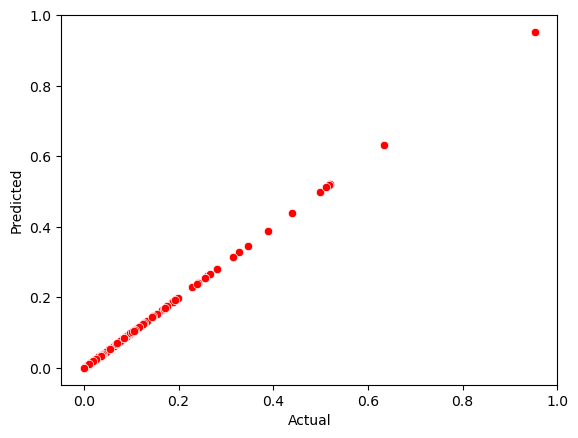

In [97]:
sn.scatterplot(x = 'Actual' , y = 'Predicted' , data = result , color = 'red')

C:\Users\user\AppData\Local\Temp\ipykernel_7720\2543204542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(result)


<Axes: ylabel='Density'>

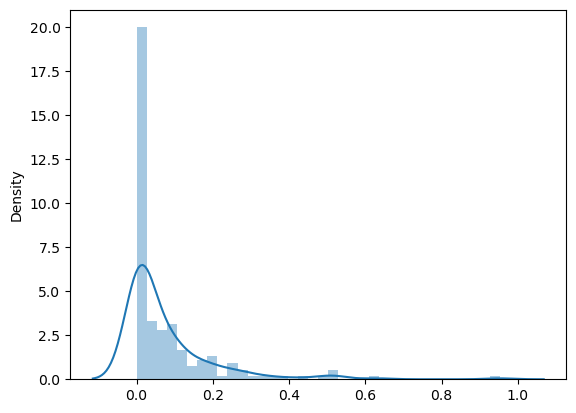

In [103]:
sn.distplot(result)
